<a href="https://colab.research.google.com/github/celisa/Reinforcement-Learning-Repo/blob/main/hw3/AIPI_531_HW3_Elisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIPI 531 - HW3**
## Elisa Chen
NetID: eyc11

## **Installation**

In [ ]:
!pip install git+https://github.com/celisa/d3rlpy.git

In [17]:
#import necessary libaries
import gym
import numpy as np
import torch as th
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
from d3rlpy.datasets import get_cartpole
from d3rlpy.algos import DiscreteCQL
from d3rlpy.gpu import Device
from d3rlpy.metrics.scorer import evaluate_on_environment
from d3rlpy.metrics.scorer import initial_state_value_estimation_scorer
from d3rlpy.metrics.scorer import soft_opc_scorer
from d3rlpy.metrics.scorer import evaluate_true_q

## **Training Offline (Discrete) CQL on CartPole Game**

In [ ]:
# get CartPole dataset
dataset, env = get_cartpole()

In [97]:
# split dataset
train_episodes, test_episodes = train_test_split(dataset, test_size=0.1)

# prepare algorithm
cql = DiscreteCQL(actor_learning_rate=1e-4,
              critic_learning_rate=1e-4,
              temp_learning_rate=1e-4,
            use_gpu = False,
            n_steps = 10,
          q_func_factory='mean'
          )

# start training
cql.fit(
    train_episodes,
    eval_episodes=test_episodes,
    n_epochs=30,
    scorers={
                'estimated_q_value': initial_state_value_estimation_scorer,
                "true_q_value": evaluate_true_q
            },
    save_metrics = True,
)

2023-03-23 00:48:45 [warning  ] Unused arguments are passed.   actor_learning_rate=0.0001 critic_learning_rate=0.0001 temp_learning_rate=0.0001
2023-03-23 00:48:46 [debug    ] RoundIterator is selected.
2023-03-23 00:48:46 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20230323004846
2023-03-23 00:48:46 [debug    ] Building models...
2023-03-23 00:48:46 [debug    ] Models have been built.
2023-03-23 00:48:46 [info     ] Parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 10, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'r

Epoch 1/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:49:05 [info     ] DiscreteCQL_20230323004846: epoch=1 step=2805 epoch=1 metrics={'time_sample_batch': 0.00023884118772020526, 'time_algorithm_update': 0.006215485659512607, 'loss': 2.019126834482645, 'time_step': 0.006614152802928034, 'estimated_q_value': 9.498978614807129, 'true_q_value': 10.25719928741455} step=2805
2023-03-23 00:49:05 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_2805.pt


Epoch 2/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:49:22 [info     ] DiscreteCQL_20230323004846: epoch=2 step=5610 epoch=2 metrics={'time_sample_batch': 0.0001536582667984852, 'time_algorithm_update': 0.005411776034377263, 'loss': 1.195439515096831, 'time_step': 0.0056649828552137295, 'estimated_q_value': 9.576969146728516, 'true_q_value': 10.244763374328613} step=5610
2023-03-23 00:49:22 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_5610.pt


Epoch 3/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:49:39 [info     ] DiscreteCQL_20230323004846: epoch=3 step=8415 epoch=3 metrics={'time_sample_batch': 0.00017616132576410358, 'time_algorithm_update': 0.005741602681749857, 'loss': 1.4383810987659529, 'time_step': 0.006032475048207982, 'estimated_q_value': 18.086610794067383, 'true_q_value': 18.53898048400879} step=8415
2023-03-23 00:49:39 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_8415.pt


Epoch 4/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:49:57 [info     ] DiscreteCQL_20230323004846: epoch=4 step=11220 epoch=4 metrics={'time_sample_batch': 0.00017583663450842872, 'time_algorithm_update': 0.0059523502560647834, 'loss': 2.3733628275560186, 'time_step': 0.006253004414087523, 'estimated_q_value': 18.088520050048828, 'true_q_value': 18.506032943725586} step=11220
2023-03-23 00:49:57 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_11220.pt


Epoch 5/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:50:16 [info     ] DiscreteCQL_20230323004846: epoch=5 step=14025 epoch=5 metrics={'time_sample_batch': 0.00019946064328552355, 'time_algorithm_update': 0.005972910947340695, 'loss': 2.347017884721943, 'time_step': 0.0062964971477760135, 'estimated_q_value': 18.041120529174805, 'true_q_value': 18.422157287597656} step=14025
2023-03-23 00:50:16 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_14025.pt


Epoch 6/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:50:33 [info     ] DiscreteCQL_20230323004846: epoch=6 step=16830 epoch=6 metrics={'time_sample_batch': 0.00017865838851520723, 'time_algorithm_update': 0.0057748845554290605, 'loss': 2.7204174494360855, 'time_step': 0.006081186896339457, 'estimated_q_value': 25.699398040771484, 'true_q_value': 26.05034828186035} step=16830
2023-03-23 00:50:33 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_16830.pt


Epoch 7/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:50:51 [info     ] DiscreteCQL_20230323004846: epoch=7 step=19635 epoch=7 metrics={'time_sample_batch': 0.0001690360526562587, 'time_algorithm_update': 0.0058940974148837, 'loss': 3.4479186130079995, 'time_step': 0.006189731863093248, 'estimated_q_value': 25.70134925842285, 'true_q_value': 25.986360549926758} step=19635
2023-03-23 00:50:51 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_19635.pt


Epoch 8/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:51:09 [info     ] DiscreteCQL_20230323004846: epoch=8 step=22440 epoch=8 metrics={'time_sample_batch': 0.00016910549578607188, 'time_algorithm_update': 0.005650996481883547, 'loss': 3.403073906431011, 'time_step': 0.005944442409032594, 'estimated_q_value': 25.82252311706543, 'true_q_value': 26.021621704101562} step=22440
2023-03-23 00:51:09 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_22440.pt


Epoch 9/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:51:26 [info     ] DiscreteCQL_20230323004846: epoch=9 step=25245 epoch=9 metrics={'time_sample_batch': 0.0001715680494665462, 'time_algorithm_update': 0.005740685726444564, 'loss': 3.874528701760127, 'time_step': 0.006042928661679626, 'estimated_q_value': 32.746063232421875, 'true_q_value': 32.82492446899414} step=25245
2023-03-23 00:51:26 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_25245.pt


Epoch 10/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:51:44 [info     ] DiscreteCQL_20230323004846: epoch=10 step=28050 epoch=10 metrics={'time_sample_batch': 0.00016561905967997994, 'time_algorithm_update': 0.005691205329011044, 'loss': 4.37664682784395, 'time_step': 0.005979315694853159, 'estimated_q_value': 32.74803924560547, 'true_q_value': 32.746795654296875} step=28050
2023-03-23 00:51:44 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_28050.pt


Epoch 11/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:52:01 [info     ] DiscreteCQL_20230323004846: epoch=11 step=30855 epoch=11 metrics={'time_sample_batch': 0.00017526859480641955, 'time_algorithm_update': 0.005559034908519072, 'loss': 4.32627178662176, 'time_step': 0.005858499438579919, 'estimated_q_value': 32.711307525634766, 'true_q_value': 32.76656723022461} step=30855
2023-03-23 00:52:01 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_30855.pt


Epoch 12/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:52:18 [info     ] DiscreteCQL_20230323004846: epoch=12 step=33660 epoch=12 metrics={'time_sample_batch': 0.00017851763230594084, 'time_algorithm_update': 0.005831384573815766, 'loss': 4.895760615454213, 'time_step': 0.006146899221627682, 'estimated_q_value': 38.98725509643555, 'true_q_value': 38.824134826660156} step=33660
2023-03-23 00:52:18 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_33660.pt


Epoch 13/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:52:35 [info     ] DiscreteCQL_20230323004846: epoch=13 step=36465 epoch=13 metrics={'time_sample_batch': 0.00015490909311223158, 'time_algorithm_update': 0.005554973462898676, 'loss': 5.2066211430571725, 'time_step': 0.005835227320325991, 'estimated_q_value': 39.011756896972656, 'true_q_value': 38.86758804321289} step=36465
2023-03-23 00:52:35 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_36465.pt


Epoch 14/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:52:53 [info     ] DiscreteCQL_20230323004846: epoch=14 step=39270 epoch=14 metrics={'time_sample_batch': 0.00017825362941585547, 'time_algorithm_update': 0.0058829389153954815, 'loss': 5.166325842547969, 'time_step': 0.0061948805994316005, 'estimated_q_value': 38.89708709716797, 'true_q_value': 38.83609390258789} step=39270
2023-03-23 00:52:53 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_39270.pt


Epoch 15/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:53:11 [info     ] DiscreteCQL_20230323004846: epoch=15 step=42075 epoch=15 metrics={'time_sample_batch': 0.00016305280879219585, 'time_algorithm_update': 0.005606155089516053, 'loss': 5.8844096184626835, 'time_step': 0.00590327784764363, 'estimated_q_value': 44.6301155090332, 'true_q_value': 44.29900360107422} step=42075
2023-03-23 00:53:11 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_42075.pt


Epoch 16/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:53:28 [info     ] DiscreteCQL_20230323004846: epoch=16 step=44880 epoch=16 metrics={'time_sample_batch': 0.00016877493968834426, 'time_algorithm_update': 0.005774873675722064, 'loss': 6.063739105809393, 'time_step': 0.0060753597932703355, 'estimated_q_value': 44.46519088745117, 'true_q_value': 44.10179138183594} step=44880
2023-03-23 00:53:28 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_44880.pt


Epoch 17/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:53:45 [info     ] DiscreteCQL_20230323004846: epoch=17 step=47685 epoch=17 metrics={'time_sample_batch': 0.00016836346576983065, 'time_algorithm_update': 0.00555741442716058, 'loss': 6.026547052558518, 'time_step': 0.0058541110917633655, 'estimated_q_value': 44.490203857421875, 'true_q_value': 44.101318359375} step=47685
2023-03-23 00:53:45 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_47685.pt


Epoch 18/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:54:03 [info     ] DiscreteCQL_20230323004846: epoch=18 step=50490 epoch=18 metrics={'time_sample_batch': 0.00017545890468114624, 'time_algorithm_update': 0.005700299914082954, 'loss': 6.791780423735553, 'time_step': 0.006011660978755849, 'estimated_q_value': 49.698917388916016, 'true_q_value': 49.255367279052734} step=50490
2023-03-23 00:54:03 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_50490.pt


Epoch 19/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:54:20 [info     ] DiscreteCQL_20230323004846: epoch=19 step=53295 epoch=19 metrics={'time_sample_batch': 0.00016749461916891223, 'time_algorithm_update': 0.00564887561900093, 'loss': 6.825012687225818, 'time_step': 0.005944675047767353, 'estimated_q_value': 49.59426498413086, 'true_q_value': 49.16443634033203} step=53295
2023-03-23 00:54:20 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_53295.pt


Epoch 20/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:54:38 [info     ] DiscreteCQL_20230323004846: epoch=20 step=56100 epoch=20 metrics={'time_sample_batch': 0.00018352280751056637, 'time_algorithm_update': 0.00579229429656384, 'loss': 6.8377128805068725, 'time_step': 0.006109699208468677, 'estimated_q_value': 54.09394073486328, 'true_q_value': 53.475135803222656} step=56100
2023-03-23 00:54:38 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_56100.pt


Epoch 21/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:54:56 [info     ] DiscreteCQL_20230323004846: epoch=21 step=58905 epoch=21 metrics={'time_sample_batch': 0.0001816112939899193, 'time_algorithm_update': 0.005849928354409502, 'loss': 7.6375529659410635, 'time_step': 0.006166711083070479, 'estimated_q_value': 54.12700271606445, 'true_q_value': 53.53447341918945} step=58905
2023-03-23 00:54:56 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_58905.pt


Epoch 22/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:55:14 [info     ] DiscreteCQL_20230323004846: epoch=22 step=61710 epoch=22 metrics={'time_sample_batch': 0.0001790221787179005, 'time_algorithm_update': 0.0059242885168010965, 'loss': 7.594440386937051, 'time_step': 0.0062483721238406585, 'estimated_q_value': 54.13170623779297, 'true_q_value': 53.48082733154297} step=61710
2023-03-23 00:55:14 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_61710.pt


Epoch 23/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:55:32 [info     ] DiscreteCQL_20230323004846: epoch=23 step=64515 epoch=23 metrics={'time_sample_batch': 0.00017280561613739067, 'time_algorithm_update': 0.005876277899784625, 'loss': 7.72579133200348, 'time_step': 0.006184348023086521, 'estimated_q_value': 58.38686752319336, 'true_q_value': 57.62201690673828} step=64515
2023-03-23 00:55:32 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_64515.pt


Epoch 24/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:55:49 [info     ] DiscreteCQL_20230323004846: epoch=24 step=67320 epoch=24 metrics={'time_sample_batch': 0.000166364064616103, 'time_algorithm_update': 0.0056914998460793455, 'loss': 8.35443596533913, 'time_step': 0.005993373976246771, 'estimated_q_value': 58.429805755615234, 'true_q_value': 57.6524772644043} step=67320
2023-03-23 00:55:49 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_67320.pt


Epoch 25/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:56:08 [info     ] DiscreteCQL_20230323004846: epoch=25 step=70125 epoch=25 metrics={'time_sample_batch': 0.00019703174869856944, 'time_algorithm_update': 0.005969425021220868, 'loss': 8.317296662050135, 'time_step': 0.006301683368104877, 'estimated_q_value': 58.54735565185547, 'true_q_value': 57.76980972290039} step=70125
2023-03-23 00:56:08 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_70125.pt


Epoch 26/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:56:26 [info     ] DiscreteCQL_20230323004846: epoch=26 step=72930 epoch=26 metrics={'time_sample_batch': 0.00016841420940324372, 'time_algorithm_update': 0.005936263249307181, 'loss': 8.570920660236515, 'time_step': 0.00624422347056887, 'estimated_q_value': 62.20243835449219, 'true_q_value': 61.412940979003906} step=72930
2023-03-23 00:56:26 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_72930.pt


Epoch 27/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:56:44 [info     ] DiscreteCQL_20230323004846: epoch=27 step=75735 epoch=27 metrics={'time_sample_batch': 0.0001732620538449755, 'time_algorithm_update': 0.006094843138560467, 'loss': 9.052522970563375, 'time_step': 0.006400012969970703, 'estimated_q_value': 62.137786865234375, 'true_q_value': 61.2562370300293} step=75735
2023-03-23 00:56:44 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_75735.pt


Epoch 28/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:57:04 [info     ] DiscreteCQL_20230323004846: epoch=28 step=78540 epoch=28 metrics={'time_sample_batch': 0.000185282345124107, 'time_algorithm_update': 0.0062548843934574225, 'loss': 9.021985121249303, 'time_step': 0.006585303134884214, 'estimated_q_value': 62.166324615478516, 'true_q_value': 61.245460510253906} step=78540
2023-03-23 00:57:04 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_78540.pt


Epoch 29/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:57:22 [info     ] DiscreteCQL_20230323004846: epoch=29 step=81345 epoch=29 metrics={'time_sample_batch': 0.00016373729535815125, 'time_algorithm_update': 0.0060020405128465406, 'loss': 9.36099856193053, 'time_step': 0.0063019275665283205, 'estimated_q_value': 65.52847290039062, 'true_q_value': 64.38641357421875} step=81345
2023-03-23 00:57:22 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_81345.pt


Epoch 30/30:   0%|          | 0/2805 [00:00<?, ?it/s]

2023-03-23 00:57:41 [info     ] DiscreteCQL_20230323004846: epoch=30 step=84150 epoch=30 metrics={'time_sample_batch': 0.00019529618043950535, 'time_algorithm_update': 0.006313829455996155, 'loss': 9.703720717506613, 'time_step': 0.006647738713419161, 'estimated_q_value': 65.56578063964844, 'true_q_value': 64.38400268554688} step=84150
2023-03-23 00:57:41 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230323004846/model_84150.pt


[(1,
  {'time_sample_batch': 0.00023884118772020526,
   'time_algorithm_update': 0.006215485659512607,
   'loss': 2.019126834482645,
   'time_step': 0.006614152802928034,
   'estimated_q_value': 9.498978614807129,
   'true_q_value': 10.25719928741455}),
 (2,
  {'time_sample_batch': 0.0001536582667984852,
   'time_algorithm_update': 0.005411776034377263,
   'loss': 1.195439515096831,
   'time_step': 0.0056649828552137295,
   'estimated_q_value': 9.576969146728516,
   'true_q_value': 10.244763374328613}),
 (3,
  {'time_sample_batch': 0.00017616132576410358,
   'time_algorithm_update': 0.005741602681749857,
   'loss': 1.4383810987659529,
   'time_step': 0.006032475048207982,
   'estimated_q_value': 18.086610794067383,
   'true_q_value': 18.53898048400879}),
 (4,
  {'time_sample_batch': 0.00017583663450842872,
   'time_algorithm_update': 0.0059523502560647834,
   'loss': 2.3733628275560186,
   'time_step': 0.006253004414087523,
   'estimated_q_value': 18.088520050048828,
   'true_q_value':

## **Plotting Q Values**

In [98]:
#path to logs
logs_path = sorted(glob('d3rlpy_logs/DiscreteCQL_*/'))[-1]

estimated_q_values = pd.read_csv(logs_path + "estimated_q_value.csv", header = None)[[1,2]]
true_q_values = pd.read_csv(logs_path + "true_q_value.csv", header = None)[[1,2]]

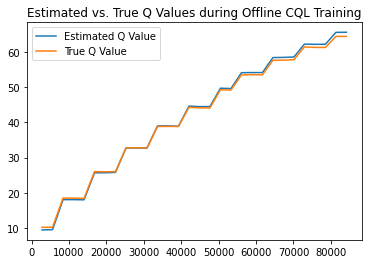

In [99]:
plt.plot(estimated_q_values[1], estimated_q_values[2], label = "Estimated Q Value")
plt.plot(true_q_values[1], true_q_values[2], label = "True Q Value")
plt.title("Estimated vs. True Q Values during Offline CQL Training")
plt.legend()
plt.show()

Generally, the model is fairly accurate in predicting the Q value during the training process. For the most part, we can see that the estimated and true Q values are aligned, but after ~50k training steps, the estimated Q value starts to increase above the true Q value. This is consistent with the fact that the predicted Q values tend to overestimate the rewards due to the out of distribution problem.